<a href="https://colab.research.google.com/github/georgywasiat/Image-Classification-of-Real-vs.-AI-Generated-Shoe-Using-CNN/blob/main/Image_Classification_of_Real_vs_AI_Generated_Shoe_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Georgy Banny Rizky Wasiat

In [ ]:
import os
import shutil
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
drive.mount('/content/drive')
dataset_path = "/content/drive/My Drive/Portofolio/shoes"
base_dir = "/content/drive/My Drive/Portofolio/shoes"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.listdir(dataset_path)

['ai', 'real']

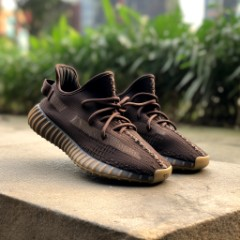

Label: ai


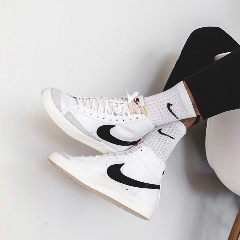

Label: real


In [ ]:
from IPython.display import Image, display

# List sub-direktori atau file dalam dataset_path
subdirectories = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

# Iterasi melalui setiap sub-direktori dan menampilkan satu gambar dari setiap sub-direktori
for subdirectory in subdirectories:
    subdirectory_path = os.path.join(dataset_path, subdirectory)

    # Ambil satu file gambar dari setiap sub-direktori
    image_files = [f for f in os.listdir(subdirectory_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    if image_files:
        # Ambil satu gambar pertama dari setiap sub-direktori
        sample_image_path = os.path.join(subdirectory_path, image_files[0])

        # Menampilkan gambar dengan keterangan
        display(Image(filename=sample_image_path, width=200, height=200))
        print(f"Label: {subdirectory}")

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap',
                    validation_split=0.4)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(100, 150),
        #class_mode='sparse',
        shuffle=True,
        subset='training')

validation_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(100, 150),
        #class_mode='sparse',
        subset='validation')

Found 1309 images belonging to 2 classes.
Found 872 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')

])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
model.fit(
      train_generator,
      steps_per_epoch=32,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=8,
      verbose=2)

Epoch 1/20
32/32 - 156s - loss: 0.4743 - accuracy: 0.8311 - val_loss: 0.4172 - val_accuracy: 0.8242 - 156s/epoch - 5s/step
Epoch 2/20
32/32 - 51s - loss: 0.3032 - accuracy: 0.8874 - val_loss: 0.3775 - val_accuracy: 0.8359 - 51s/epoch - 2s/step
Epoch 3/20
32/32 - 42s - loss: 0.2573 - accuracy: 0.8874 - val_loss: 0.4119 - val_accuracy: 0.8438 - 42s/epoch - 1s/step
Epoch 4/20
32/32 - 43s - loss: 0.2282 - accuracy: 0.9070 - val_loss: 0.3323 - val_accuracy: 0.8828 - 43s/epoch - 1s/step
Epoch 5/20
32/32 - 34s - loss: 0.1921 - accuracy: 0.9216 - val_loss: 0.2363 - val_accuracy: 0.9141 - 34s/epoch - 1s/step
Epoch 6/20
32/32 - 29s - loss: 0.1939 - accuracy: 0.9265 - val_loss: 0.5434 - val_accuracy: 0.8750 - 29s/epoch - 900ms/step
Epoch 7/20
32/32 - 32s - loss: 0.1637 - accuracy: 0.9422 - val_loss: 0.1990 - val_accuracy: 0.9141 - 32s/epoch - 1s/step
Epoch 8/20
32/32 - 27s - loss: 0.1562 - accuracy: 0.9373 - val_loss: 0.2151 - val_accuracy: 0.9258 - 27s/epoch - 835ms/step
Epoch 9/20
32/32 - 27s -

In [ ]:
# Menyimpan arsitektur model ke dalam file JSON
model_json = model.to_json()
with open("shoes_cnn.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

Saving gambar sepatu sendiri.jpg to gambar sepatu sendiri (1).jpg
1/1 [==============================] - 0s 29ms/step
gambar sepatu sendiri (1).jpg
Gambar Sepatu Real


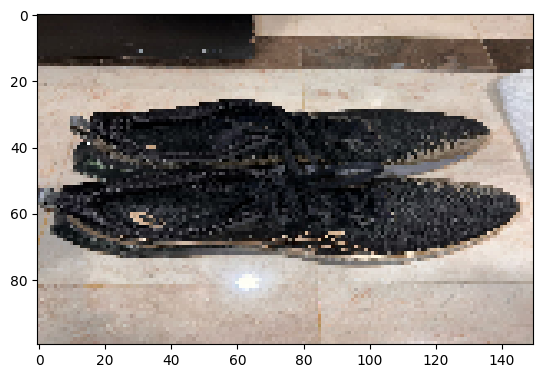

In [ ]:
# Memuat gambar yang akan diprediksi
uploaded = files.upload()

for fn in uploaded.keys():
    # Memprediksi Gambar
    path = fn
    img = image.load_img(path, target_size=(100,150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)

    print(fn)
    if classes[0][0] > classes[0][1]:
        print('Gambar Sepatu oleh AI')
    else:
        print('Gambar Sepatu Real')

In [ ]:
from keras.models import load_model

model.save('model_cnn.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import files
files.download('model_cnn.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>